In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps

import xtrack as xt
import xpart as xp
import xobjects as xo
import xcoll as xc

# Line without sagitta

## Experimental values from Hannes

In [31]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
env = line.env

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [32]:
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f"dQx={tw.dqx}, dQy={tw.dqy}")

Qx=20.130095529125725, Qy=20.18009638231107
dQx=11.224914945659666, dQy=10.295691082289986


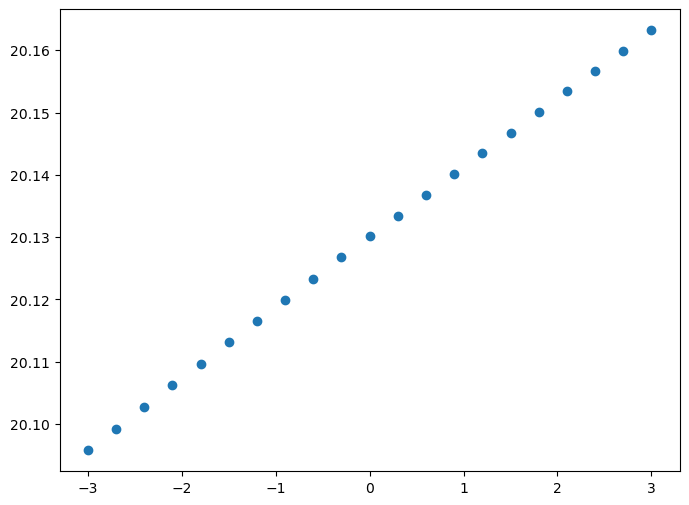

In [33]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses_bef = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses_bef], label='dQx', color='C0')

In [34]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [35]:
# Set the sextupole strengths according to Hannes' measurements with knobs (klsfa0, klsfb0, klsda0, klsdb0)
# Problem with the knob (according to Frederik), it is said to be kl but it is actually k
env.vars['qph_setvalue'] = 0.0
env.vars['qpv_setvalue'] = 0.0

env.vars['klsfa0'] = 0.4883e-1 #* line['lsf.61205'].length
env.vars['klsfb0'] = -0.2892e-1 #* line['lsf.62605'].length
env.vars['klsda0'] = -0.2917e-1 #* line['lsd.62505'].length
env.vars['klsdb0'] = 0.4517e-1 #* line['lsd.63505'].length

In [36]:
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f"dQx={tw.dqx}, dQy={tw.dqy}")

Qx=20.130095527123782, Qy=20.180096383329897
dQx=-1.0494925074170924, dQy=-38.95205439427582


In [37]:
# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.13e-3, 0., -5.94, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.23e-3, 0., -3.54, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.84e-1, 0., -1.04e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -1.84e-1, 0., 0.89e3])

In [38]:
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f'dqx={tw.dqx}, dqy={tw.dqy}')

Qx=20.12932426153646, Qy=20.18079069090307
dqx=4.286754198411064, dqy=-26.88726294398654


In [10]:
opt = line.match(
    method='4d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad')
    ],
    targets = [
        xt.TargetSet(qx=20.13, qy=20.18, tol=1e-6, tag='tune')
    ])

                                             
Optimize - start penalty: 0.01036                           
Matching: model call n. 5 penalty = 1.1209e-07              
Optimize - end penalty:  1.12094e-07                            


In [29]:
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f'dqx={tw.dqx}, dqy={tw.dqy}')

Qx=20.12932554866205, Qy=20.18078973385575
dqx=-7.948983130018409, dqy=-17.633819742278575


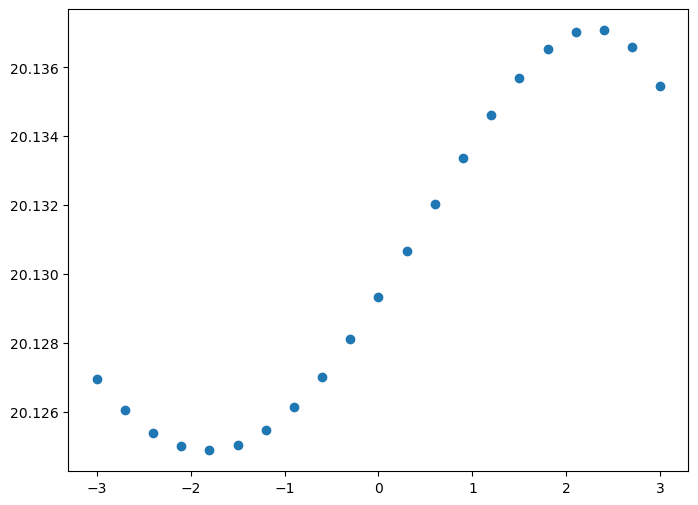

In [39]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [8]:
line.to_json('error_lines/sps_q20_inj_exp_errors.json')

## General fitted model

In [13]:
line = xt.Line.from_json('../../injection_lines/sps_q20_inj.json')
env = line.env

Loading line from dict:   0%|          | 0/4037 [00:00<?, ?it/s]

Done loading line from dict.           


In [10]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [11]:
env.vars['qph_setvalue'] = 0.4
env.vars['qpv_setvalue'] = 0.4

# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.12e-3, 0., -5.74, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.19e-3, 0., -5.10, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.75e-1, 0., -0.87e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -2.03e-1, 0., 2.04e3])

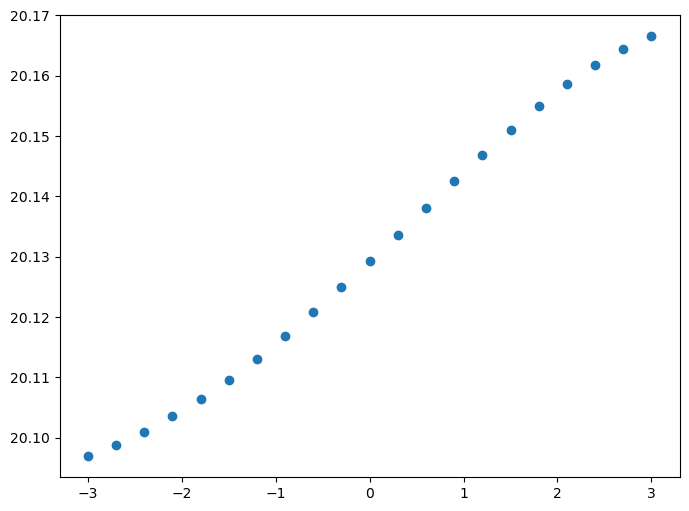

In [12]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [13]:
line.to_json('error_lines/sps_q20_inj_fitted_errors.json')

# Line with sagitta

In [14]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
env = line.env

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           


In [15]:
tw = line.twiss()
print(f"Matched tunes: Qx={tw.qx}, Qy={tw.qy}")

Matched tunes: Qx=20.11931883953473, Qy=20.169372565287162


In [16]:
env.vars['qph_setvalue'] = 0.4
env.vars['qpv_setvalue'] = 0.4

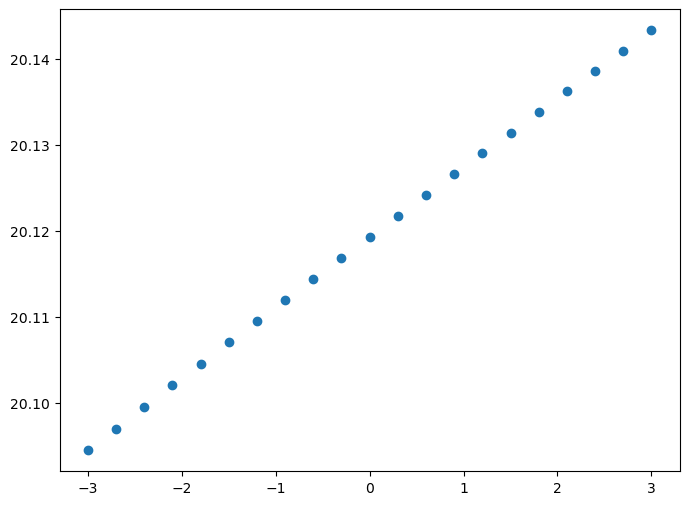

In [17]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses_bef = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses_bef], label='dQx', color='C0')

In [18]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [19]:
env.vars['qph_setvalue'] = 0.4
env.vars['qpv_setvalue'] = 0.4

# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.12e-3, 0., -5.74, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.19e-3, 0., -5.10, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.75e-1, 0., -0.87e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -2.03e-1, 0., 2.04e3])

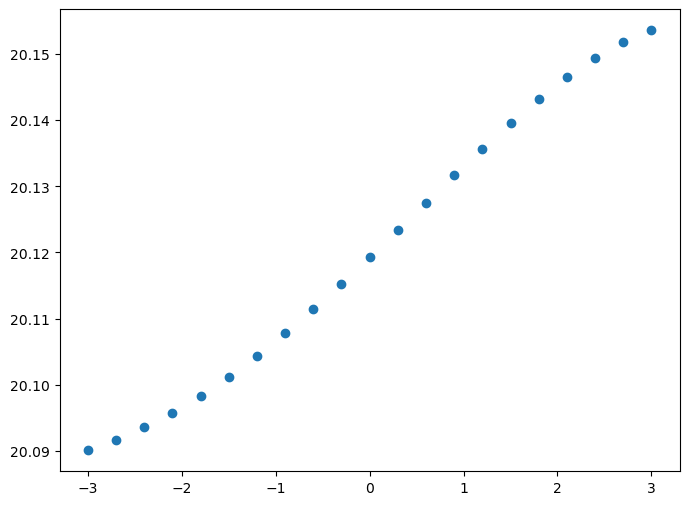

In [20]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [30]:
line.to_json('error_lines/sps_with_aperture_inj_q20_beam_sagitta_fitted_errors.json')

# Line preparation for simulations (with sagitta)
We want to match tune and chromaticity with special knob added to the setval

In [2]:
def remove_offmom_bpms_apers(line, exn=3.5e-6, nrj=21, pmass=0.938, bucket_height=3e-3, n_buckets=2):
    "Remove apertures of off-momentum BPMs which give flanges as bottlenecks"
    tt = line.get_table()
    mask_disp = 5*np.sqrt(tw.betx*exn*pmass/nrj)+n_buckets*bucket_height*tw.dx > 0.025
    mask_bpm = ['bp' in name for name in tt.name]
    mask_aper = np.array(['aper' in name for name in tt.name])
    offmom_bpms = tt.name[mask_disp & mask_bpm & ~mask_aper]
    aper_to_remove = [f'{name}{suffix}' for name in offmom_bpms for suffix in ('.a_aper', '.b_aper')]
    line.remove(aper_to_remove)

## Error lines

Chroma 0.5, 0.7, 1.0

In [3]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
env = line.env
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f"dQx={tw.dqx}, dQy={tw.dqy}")

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           
Qx=20.11931883953473, Qy=20.169372565287162
dQx=0.0580629999360581, dQy=0.01150634281403716


In [4]:
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['acl.31735'].voltage = 0 #setting 800 cav to 0V
line['actcse.31632'].voltage = 3.0e6

In [5]:
remove_offmom_bpms_apers(line, exn=3.5e-6, nrj=21, pmass=0.938, bucket_height=3e-3, n_buckets=2)

In [6]:
# optimisation targets
qx = 20.13
qy = 20.18
dqx_rel = 0.5
dqy_rel = 0.5

In [243]:
#Adapting sextupole knobs for chromaticity

# env['klsfa'] = 'klsfa + dqx_klsfa + dqy_klsfa'
# env['klsfb'] = 'klsfb + dqx_klsfb + dqy_klsfb'
# env['klsda'] = 'klsda + dqx_klsda + dqy_klsda'
# env['klsdb'] = 'klsdb + dqx_klsdb + dqy_klsdb'

In [7]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [8]:
env.vars['qph_setvalue'] = 0.0
env.vars['qpv_setvalue'] = 0.0

# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.12e-3, 0., -5.74, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.19e-3, 0., -5.10, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.75e-1, 0., -0.87e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -2.03e-1, 0., 2.04e3])

In [11]:
env.vars['qph_setvalue'] = dqx_rel
env.vars['qpv_setvalue'] = dqy_rel
opt = line.match(
    method='6d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
        xt.VaryList(['qph_setvalue', 'qpv_setvalue'], step=1e-4, tag='sext'),
    ],
    targets = [
        xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
        xt.TargetSet(dqx=dqx_rel*qx, dqy=dqy_rel*qy, tol=1e-2, tag='chrom'),
    ])

                                             
Optimize - start penalty: 13.08                             
Matching: model call n. 13 penalty = 3.9174e-05              
Optimize - end penalty:  3.91736e-05                            


In [9]:
env.element_dict['lsf.63605'], env.element_dict['lsf.63205']

(Sextupole(k2=0.0313, k2s=0, length=0.423, order=np.int64(5), inv_factorial_order=0.00833, knl=[0., 0., 0., 0., 0., 0.], ksl=[0., 0., 0., 0., 0., 0.], edge_entry_active=np.uint64(0), edge_exit_active=np.uint64(0), num_multipole_kicks=np.int64(0), model='adaptive', integrator='adaptive', radiation_flag=np.int64(0), delta_taper=0, shift_x=0, shift_y=0, shift_s=0, rot_s_rad=0, rot_x_rad=0, rot_y_rad=0, rot_s_rad_no_frame=0, rot_shift_anchor=0),
 Sextupole(k2=0.0313, k2s=0, length=0.423, order=np.int64(5), inv_factorial_order=0.00833, knl=[0., 0., 0., 0., 0., 0.], ksl=[0., 0., 0., 0., 0., 0.], edge_entry_active=np.uint64(0), edge_exit_active=np.uint64(0), num_multipole_kicks=np.int64(0), model='adaptive', integrator='adaptive', radiation_flag=np.int64(0), delta_taper=0, shift_x=0, shift_y=0, shift_s=0, rot_s_rad=0, rot_x_rad=0, rot_y_rad=0, rot_s_rad_no_frame=0, rot_shift_anchor=0))

In [12]:
env.element_dict['lsf.63605'], env.element_dict['lsf.63205']

(Sextupole(k2=0.0406, k2s=0, length=0.423, order=np.int64(5), inv_factorial_order=0.00833, knl=[0., 0., 0., 0., 0., 0.], ksl=[0., 0., 0., 0., 0., 0.], edge_entry_active=np.uint64(0), edge_exit_active=np.uint64(0), num_multipole_kicks=np.int64(0), model='adaptive', integrator='adaptive', radiation_flag=np.int64(0), delta_taper=0, shift_x=0, shift_y=0, shift_s=0, rot_s_rad=0, rot_x_rad=0, rot_y_rad=0, rot_s_rad_no_frame=0, rot_shift_anchor=0),
 Sextupole(k2=0.0406, k2s=0, length=0.423, order=np.int64(5), inv_factorial_order=0.00833, knl=[0., 0., 0., 0., 0., 0.], ksl=[0., 0., 0., 0., 0., 0.], edge_entry_active=np.uint64(0), edge_exit_active=np.uint64(0), num_multipole_kicks=np.int64(0), model='adaptive', integrator='adaptive', radiation_flag=np.int64(0), delta_taper=0, shift_x=0, shift_y=0, shift_s=0, rot_s_rad=0, rot_x_rad=0, rot_y_rad=0, rot_s_rad_no_frame=0, rot_shift_anchor=0))

In [10]:
env.info('klsfa')

#  vars['klsfa']._get_value()
   vars['klsfa'] = 0.03125797253170887

#  vars['klsfa']._expr
   vars['klsfa'] = ((vars['klsfa0'] + (vars['logical.lsfaqph'] * vars['qph_setvalue'])) + (vars['logical.lsfaqpv'] * vars['qpv_setvalue']))

#  vars['klsfa']._expr._get_dependencies()
   vars['klsfa0'] = 0.03125797253170887
   vars['logical.lsfaqpv'] = -0.002394920526527511
   vars['qpv_setvalue'] = 0.0
   vars['qph_setvalue'] = 0.0
   vars['logical.lsfaqph'] = 0.039524517589292

#  vars['klsfa']._find_dependant_targets()
   element_refs['lsf.63605'].k2
   element_refs['lsf.63205'].k2
   element_refs['lsf.62405'].k2
   element_refs['lsf.62005'].k2
   element_refs['lsf.53205'].k2
   element_refs['lsf.43205'].k2
   element_refs['lsf.32405'].k2
   element_refs['lsf.32005'].k2
   element_refs['lsf.31205'].k2
   element_refs['lsf.30805'].k2
   element_refs['lsf.23605'].k2
   element_refs['lsf.23205'].k2
   element_refs['lsf.22405'].k2
   element_refs['lsf.22005'].k2
   element_refs['lsf.21205'].k2
 

In [13]:
env.info('klsfa')

#  vars['klsfa']._get_value()
   vars['klsfa'] = 0.0405691996273484

#  vars['klsfa']._expr
   vars['klsfa'] = ((vars['klsfa0'] + (vars['logical.lsfaqph'] * vars['qph_setvalue'])) + (vars['logical.lsfaqpv'] * vars['qpv_setvalue']))

#  vars['klsfa']._expr._get_dependencies()
   vars['klsfa0'] = 0.03125797253170887
   vars['logical.lsfaqpv'] = -0.002394920526527511
   vars['qpv_setvalue'] = -0.08242917017489583
   vars['qph_setvalue'] = 0.23058638890186373
   vars['logical.lsfaqph'] = 0.039524517589292

#  vars['klsfa']._find_dependant_targets()
   element_refs['lsf.63605'].k2
   element_refs['lsf.63205'].k2
   element_refs['lsf.62405'].k2
   element_refs['lsf.62005'].k2
   element_refs['lsf.53205'].k2
   element_refs['lsf.43205'].k2
   element_refs['lsf.32405'].k2
   element_refs['lsf.32005'].k2
   element_refs['lsf.31205'].k2
   element_refs['lsf.30805'].k2
   element_refs['lsf.23605'].k2
   element_refs['lsf.23205'].k2
   element_refs['lsf.22405'].k2
   element_refs['lsf.22005'].k2
 

In [20]:
opt.target_status()

Target status:               nalty = 3.9174e-05              
id state tag   tol_met       residue   current_val    target_val description                          
0  ON    tune     True   8.23796e-10         20.13         20.13 'qx', val=20.13, tol=1e-06, weight=10
1  ON    tune     True  -3.87246e-13         20.18         20.18 'qy', val=20.18, tol=1e-06, weight=10
2  ON    chrom    True  -3.91735e-05        10.065        10.065 'dqx', val=10.065, tol=0.01, weight=1
3  ON    chrom    True  -1.03023e-07         10.09         10.09 'dqy', val=10.09, tol=0.01, weight=1 


In [21]:
opt.vary_status()

Vary status:                 
id state tag  met name         lower_limit   current_val upper_limit val_at_iter_0          step        weight
0  ON    quad OK  kqf0         None            0.0115847 None            0.0115793         1e-08             1
1  ON    quad OK  kqd0         None           -0.0115864 None            -0.011581         1e-08             1
2  ON    sext OK  qph_setvalue None             0.230586 None                  0.5        0.0001             1
3  ON    sext OK  qpv_setvalue None           -0.0824292 None                  0.5        0.0001             1


In [ ]:
# opt.reload(0)

In [ ]:
# opt.solve()

                                             
Optimize - start penalty: 13.08                              
Matching: model call n. 30 penalty = 2.7908e-05              
Optimize - end penalty:  2.79076e-05                            


In [22]:
tw = line.twiss()
print(f"Matched tunes: Qx={tw.qx}, Qy={tw.qy}")
print(f"Matched chromaticities: dQx={tw.dqx}, dQy={tw.dqy}")

Matched tunes: Qx=20.130000000823795, Qy=20.179999999999612
Matched chromaticities: dQx=10.064960826508, dQy=10.089999896977059


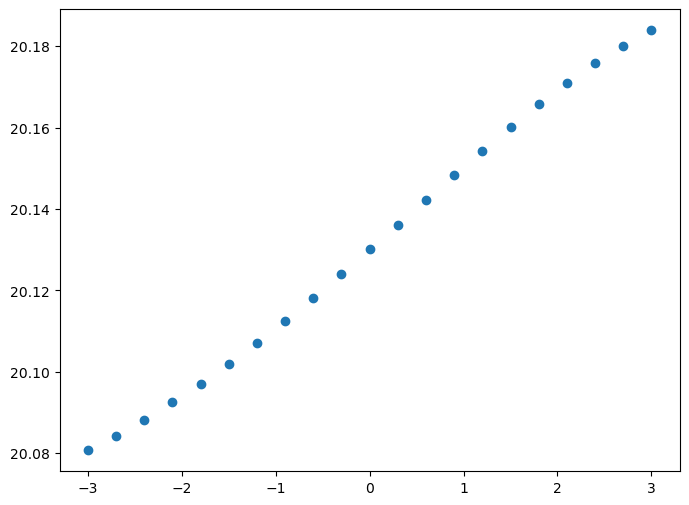

In [257]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [309]:
line.to_json(f'lines_rf_sweep_sim/sps_errors_chroma_{dqx_rel}.json')

## Line with no errors
Tune matching and chromas 0.5, 0.7, 1.0

In [14]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
env = line.env
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f"dQx={tw.dqx}, dQy={tw.dqy}")

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           
Qx=20.11931883953473, Qy=20.169372565287162
dQx=0.0580629999360581, dQy=0.01150634281403716


In [15]:
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['acl.31735'].voltage = 0 #setting 800 cav to 0V
line['actcse.31632'].voltage = 3.0e6

In [16]:
remove_offmom_bpms_apers(line, exn=3.5e-6, nrj=21, pmass=0.938, bucket_height=3e-3, n_buckets=2)

In [17]:
# optimisation targets
qx = 20.13
qy = 20.18
dqx_rel = 0.5
dqy_rel = 0.5

In [18]:
env.vars['qph_setvalue'] = dqx_rel
env.vars['qpv_setvalue'] = dqy_rel
opt = line.match(
    method='6d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
        xt.VaryList(['qph_setvalue', 'qpv_setvalue'], step=1e-4, tag='sext'),
    ],
    targets = [
        xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
        xt.TargetSet(dqx=dqx_rel*qx, dqy=dqy_rel*qy, tol=1e-2, tag='chrom'),
    ])

                                             
Optimize - start penalty: 0.1747                            
Matching: model call n. 7 penalty = 1.7532e-04              
Optimize - end penalty:  0.000175324                            


In [19]:
tw = line.twiss()
print(f"Matched tunes: Qx={tw.qx}, Qy={tw.qy}")
print(f"Matched chromaticities: dQx={tw.dqx}, dQy={tw.dqy}")

Matched tunes: Qx=20.13000064971307, Qy=20.180000946568875
Matched chromaticities: dQx=10.064981428134608, dQy=10.090173959068334


In [20]:
env.info('klsfa')

#  vars['klsfa']._get_value()
   vars['klsfa'] = 0.0497578635755554

#  vars['klsfa']._expr
   vars['klsfa'] = ((vars['klsfa0'] + (vars['logical.lsfaqph'] * vars['qph_setvalue'])) + (vars['logical.lsfaqpv'] * vars['qpv_setvalue']))

#  vars['klsfa']._expr._get_dependencies()
   vars['klsfa0'] = 0.03125797253170887
   vars['logical.lsfaqpv'] = -0.002394920526527511
   vars['qpv_setvalue'] = 0.5043948040545743
   vars['qph_setvalue'] = 0.4986240874168169
   vars['logical.lsfaqph'] = 0.039524517589292

#  vars['klsfa']._find_dependant_targets()
   element_refs['lsf.63605'].k2
   element_refs['lsf.63205'].k2
   element_refs['lsf.62405'].k2
   element_refs['lsf.62005'].k2
   element_refs['lsf.53205'].k2
   element_refs['lsf.43205'].k2
   element_refs['lsf.32405'].k2
   element_refs['lsf.32005'].k2
   element_refs['lsf.31205'].k2
   element_refs['lsf.30805'].k2
   element_refs['lsf.23605'].k2
   element_refs['lsf.23205'].k2
   element_refs['lsf.22405'].k2
   element_refs['lsf.22005'].k2
   e

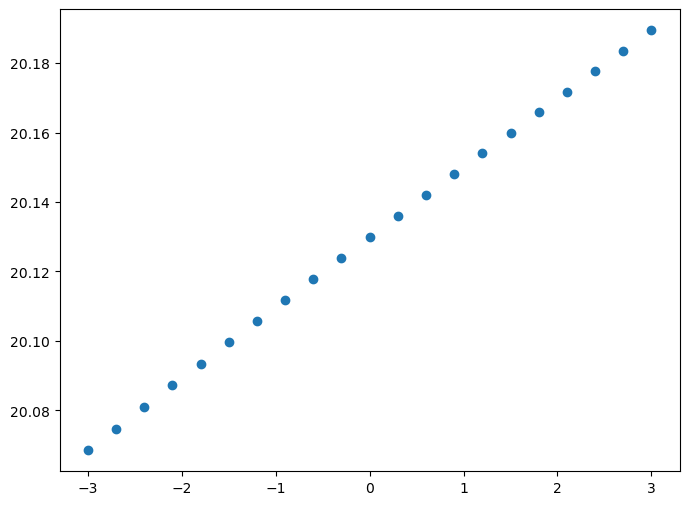

In [279]:
deltas = np.linspace(-3e-3, 3e-3, 21)
twisses = [line.twiss4d(delta0=d) for d in deltas]

fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.scatter(deltas*1e3, [twiss.qx for twiss in twisses], label='dQx', color='C0')

In [330]:
line.to_json(f'lines_rf_sweep_sim/sps_chroma_{dqx_rel}.json')

# Test

In [22]:
LM = xc.LossMap.from_json('../../archive/DiffusionRectXY/lossmap_plots/combined_jsons/LM_errors_xlshell.json')

In [ ]:
%matplotlib tk
LM.warm_regions = [[0,7000]]
LM.plot(energy=False, n)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='s [m]', ylabel='Norm. inefficiency [1/m]'>)

In [26]:
LM.lossmap['collimator']

{'name': array(['tcsm.51932'], dtype='<U10'),
 'n': array([7030.]),
 'e': array([0.]),
 'length': array([1.83]),
 's': array([5220.5916]),
 'type': array(['Unknown'], dtype='<U7')}

In [17]:
LM.interpolation

0.1

In [27]:
N_tot = 7030/1.83 + 5102/0.1
LM.aperture_losses['n_bins'].max()/0.1/N_tot

np.float64(0.34596191504493184)

In [28]:
7030/1.83/N_tot

0.07002229159154792

# Check orbit correction

In [2]:
line = xt.load('lines_rf_sweep_sim/sps_errors_chroma_0.5.json')

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
tw = line.twiss()

In [41]:
line2 = xt.load('lines_rf_sweep_sim/sps_chroma_0.5.json')

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           


In [7]:
tw2 = line2.twiss()

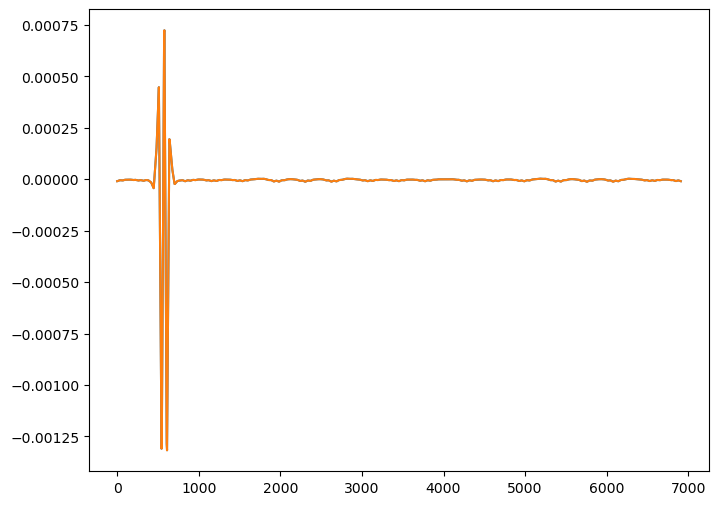

In [8]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(tw.s, tw.x)
ax.plot(tw2.s, tw2.x)

# Optimisation try 2

In [29]:
line = xt.Line.from_json('../../injection_lines/sps_with_aperture_inj_q20_beam_sagitta4.json')
env = line.env
tw = line.twiss()
print(f"Qx={tw.qx}, Qy={tw.qy}")
print(f"dQx={tw.dqx}, dQy={tw.dqy}")

Loading line from dict:   0%|          | 0/36381 [00:00<?, ?it/s]

Done loading line from dict.           
Qx=20.11931883953473, Qy=20.169372565287162
dQx=0.0580629999360581, dQy=0.01150634281403716


In [30]:
cavity_elements, cavity_names = line.get_elements_of_type(xt.Cavity)

for name in cavity_names:
    line[name].frequency = 200e6
    line[name].lag = 180
line['acl.31735'].voltage = 0 #setting 800 cav to 0V
line['actcse.31632'].voltage = 3.0e6

In [31]:
remove_offmom_bpms_apers(line, exn=3.5e-6, nrj=21, pmass=0.938, bucket_height=3e-3, n_buckets=2)

In [32]:
# optimisation targets
qx = 20.13
qy = 20.18
dqx_rel = 0.5
dqy_rel = 0.5

In [33]:
env['d1'] = 0
env['d2'] = 0

env['klsfa'] = 'klsfa + d1'
env['klsfb'] = 'klsfb + d1'
env['klsda'] = 'klsda + d2'
env['klsdb'] = 'klsdb + d2'

In [34]:
tte = env.elements.get_table()
mask_rbends = tte.element_type == 'RBend'
mask_quads = tte.element_type == 'Quadrupole'
mask_sextupoles = tte.element_type == 'Sextupole'

mba = tte.rows[mask_rbends].rows['mba.*'].name
mbb = tte.rows[mask_rbends].rows['mbb.*'].name
qf = tte.rows[mask_quads].rows['qf.*'].name
qd = tte.rows[mask_quads].rows['qd.*'].name
lsf = tte.rows[mask_sextupoles].rows['lsf.*'].name
lsd = tte.rows[mask_sextupoles].rows['lsd.*'].name

In [35]:
env.vars['qph_setvalue'] = 0.0
env.vars['qpv_setvalue'] = 0.0

# Set the strengths according to Hannes' measurements
for nn in mba:
    env[nn].knl = np.array([0., 0., 2.12e-3, 0., -5.74, 0.])

for nn in mbb:
    env[nn].knl = np.array([0., 0., -3.19e-3, 0., -5.10, 0.])

for nn in qf:
    env[nn].knl = np.array([0., 0., 0., 0.75e-1, 0., -0.87e3])

for nn in qd:
    env[nn].knl = np.array([0., 0., 0., -2.03e-1, 0., 2.04e3])

In [36]:
env.vars['qph_setvalue'] = dqx_rel
env.vars['qpv_setvalue'] = dqy_rel
opt = line.match(
    method='6d', # <- passed to twiss
    vary=[
        xt.VaryList(['kqf0', 'kqd0'], step=1e-8, tag='quad'),
        xt.VaryList(['d1', 'd2'], step=1e-4, tag='sext'),
    ],
    targets = [
        xt.TargetSet(qx=qx, qy=qy, tol=1e-6, tag='tune'),
        xt.TargetSet(dqx=dqx_rel*qx, dqy=dqy_rel*qy, tol=1e-2, tag='chrom'),
    ])

                                             
Optimize - start penalty: 0.3068                            


KeyboardInterrupt: 

In [37]:
env.info('qph_setvalue')

#  vars['qph_setvalue']._get_value()
   vars['qph_setvalue'] = 0.5

#  vars['qph_setvalue']._expr is None

#  vars['qph_setvalue']._find_dependant_targets()
   vars['klsfc']
   element_refs['lsf.61205'].k2
   element_refs['lsf.60805'].k2
   element_refs['lsf.53605'].k2
   element_refs['lsf.52405'].k2
   element_refs['lsf.52005'].k2
   element_refs['lsf.51205'].k2
   element_refs['lsf.50805'].k2
   element_refs['lsf.43605'].k2
   element_refs['lsf.42405'].k2
   element_refs['lsf.42005'].k2
   element_refs['lsf.41205'].k2
   element_refs['lsf.40805'].k2
   element_refs['lsf.33605'].k2
   element_refs['lsf.33205'].k2



In [49]:
env.vars['qph_setvalue']._find_dependant_targets()

[vars['qph_setvalue'],
 vars['klsfc'],
 element_refs['lsf.61205'].k2,
 element_refs['lsf.61205'],
 element_refs['lsf.60805'],
 element_refs['lsf.60805'].k2,
 element_refs['lsf.53605'],
 element_refs['lsf.53605'].k2,
 element_refs['lsf.52405'],
 element_refs['lsf.52405'].k2,
 element_refs['lsf.52005'],
 element_refs['lsf.52005'].k2,
 element_refs['lsf.51205'],
 element_refs['lsf.51205'].k2,
 element_refs['lsf.50805'],
 element_refs['lsf.50805'].k2,
 element_refs['lsf.43605'],
 element_refs['lsf.43605'].k2,
 element_refs['lsf.42405'],
 element_refs['lsf.42405'].k2,
 element_refs['lsf.42005'],
 element_refs['lsf.42005'].k2,
 element_refs['lsf.41205'].k2,
 element_refs['lsf.41205'],
 element_refs['lsf.40805'].k2,
 element_refs['lsf.40805'],
 element_refs['lsf.33605'],
 element_refs['lsf.33605'].k2,
 element_refs['lsf.33205'],
 element_refs['lsf.33205'].k2]

In [51]:
env.info('klsfc')

#  vars['klsfc']._get_value()
   vars['klsfc'] = 0.04982277106309112

#  vars['klsfc']._expr
   vars['klsfc'] = ((vars['klsfc0'] + (vars['logical.lsfcqph'] * vars['qph_setvalue'])) + (vars['logical.lsfcqpv'] * vars['qpv_setvalue']))

#  vars['klsfc']._expr._get_dependencies()
   vars['logical.lsfcqph'] = 0.039524517589292
   vars['qpv_setvalue'] = 0.5
   vars['klsfc0'] = 0.03125797253170887
   vars['logical.lsfcqpv'] = -0.002394920526527511
   vars['qph_setvalue'] = 0.5

#  vars['klsfc']._find_dependant_targets()
   element_refs['lsf.61205'].k2
   element_refs['lsf.60805'].k2
   element_refs['lsf.53605'].k2
   element_refs['lsf.52405'].k2
   element_refs['lsf.52005'].k2
   element_refs['lsf.51205'].k2
   element_refs['lsf.50805'].k2
   element_refs['lsf.43605'].k2
   element_refs['lsf.42405'].k2
   element_refs['lsf.42005'].k2
   element_refs['lsf.41205'].k2
   element_refs['lsf.40805'].k2
   element_refs['lsf.33605'].k2
   element_refs['lsf.33205'].k2



In [52]:
env.info('klsfa')

#  vars['klsfa']._get_value()
   vars['klsfa'] = -0.0007827468237736485

#  vars['klsfa']._expr
   vars['klsfa'] = (vars['klsfa'] + vars['d1'])

#  vars['klsfa']._expr._get_dependencies()
   vars['d1'] = -0.00013587367194035262
   vars['klsfa'] = -0.0007827468237736485

#  vars['klsfa']._find_dependant_targets()
   element_refs['lsf.63605'].k2
   element_refs['lsf.63205'].k2
   element_refs['lsf.62405'].k2
   element_refs['lsf.62005'].k2
   element_refs['lsf.53205'].k2
   element_refs['lsf.43205'].k2
   element_refs['lsf.32405'].k2
   element_refs['lsf.32005'].k2
   element_refs['lsf.31205'].k2
   element_refs['lsf.30805'].k2
   element_refs['lsf.23605'].k2
   element_refs['lsf.23205'].k2
   element_refs['lsf.22405'].k2
   element_refs['lsf.22005'].k2
   element_refs['lsf.21205'].k2
   ... set _info(limit=None) to get all lines



In [50]:
env.vars['qpv_setvalue']._find_dependant_targets()

[vars['qpv_setvalue'],
 vars['klsfc'],
 element_refs['lsf.61205'].k2,
 element_refs['lsf.61205'],
 element_refs['lsf.60805'],
 element_refs['lsf.60805'].k2,
 element_refs['lsf.53605'],
 element_refs['lsf.53605'].k2,
 element_refs['lsf.52405'],
 element_refs['lsf.52405'].k2,
 element_refs['lsf.52005'],
 element_refs['lsf.52005'].k2,
 element_refs['lsf.51205'],
 element_refs['lsf.51205'].k2,
 element_refs['lsf.50805'],
 element_refs['lsf.50805'].k2,
 element_refs['lsf.43605'],
 element_refs['lsf.43605'].k2,
 element_refs['lsf.42405'],
 element_refs['lsf.42405'].k2,
 element_refs['lsf.42005'],
 element_refs['lsf.42005'].k2,
 element_refs['lsf.41205'].k2,
 element_refs['lsf.41205'],
 element_refs['lsf.40805'].k2,
 element_refs['lsf.40805'],
 element_refs['lsf.33605'],
 element_refs['lsf.33605'].k2,
 element_refs['lsf.33205'],
 element_refs['lsf.33205'].k2]

In [47]:
env.info('qph_setvalue')

#  vars['qph_setvalue']._get_value()
   vars['qph_setvalue'] = 0.5

#  vars['qph_setvalue']._expr is None

#  vars['qph_setvalue']._find_dependant_targets()
   vars['klsfc']
   element_refs['lsf.61205'].k2
   element_refs['lsf.60805'].k2
   element_refs['lsf.53605'].k2
   element_refs['lsf.52405'].k2
   element_refs['lsf.52005'].k2
   element_refs['lsf.51205'].k2
   element_refs['lsf.50805'].k2
   element_refs['lsf.43605'].k2
   element_refs['lsf.42405'].k2
   element_refs['lsf.42005'].k2
   element_refs['lsf.41205'].k2
   element_refs['lsf.40805'].k2
   element_refs['lsf.33605'].k2
   element_refs['lsf.33205'].k2



In [38]:
tt = line.get_table()

In [48]:
tt.rows['lsf.*'].show()

name                             s element_type            isthick isreplica parent_name ...
lsf.10205                  62.7869 Sextupole                  True     False None       
lsf.10805                  254.773 Sextupole                  True     False None       
lsf.11205                  382.764 Sextupole                  True     False None       
lsf.11405_entry            446.759 Marker                    False     False None       
lsf.11405..entry_map       446.759 ThinSliceSextupoleEntry   False     False lsf.11405  
lsf.11405..0               446.759 ThickSliceSextupole        True     False lsf.11405  
lsf.11405.a_aper           446.771 LimitEllipse              False     False None       
lsf.11405..1               446.771 ThickSliceSextupole        True     False lsf.11405  
lsf.11405.b_aper            447.17 LimitEllipse              False     False None       
lsf.11405..2                447.17 ThickSliceSextupole        True     False lsf.11405  
lsf.11405..exit_m

In [42]:
tt2 = line2.get_table()

In [43]:
tt2.rows['lsf.*']

Table: 390 rows, 11 cols
name                             s element_type            isthick isreplica parent_name ...
lsf.10205                  62.7869 Sextupole                  True     False None       
lsf.10805                  254.773 Sextupole                  True     False None       
lsf.11205                  382.764 Sextupole                  True     False None       
lsf.11405_entry            446.759 Marker                    False     False None       
lsf.11405..entry_map       446.759 ThinSliceSextupoleEntry   False     False lsf.11405  
lsf.11405..0               446.759 ThickSliceSextupole        True     False lsf.11405  
lsf.11405.a_aper           446.771 LimitEllipse              False     False None       
lsf.11405..1               446.771 ThickSliceSextupole        True     False lsf.11405  
lsf.11405.b_aper            447.17 LimitEllipse              False     False None       
lsf.11405..2                447.17 ThickSliceSextupole        True     False lsf.